In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("dadosabertos_graduacao_quantitativo-de-alunos.xlsx")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Começando a EDA

In [2]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CodCurso      2134 non-null   int64 
 1   NomeCurso     2134 non-null   object
 2   Ano           2134 non-null   int64 
 3   Periodo       2134 non-null   int64 
 4   Vinculados    2134 non-null   int64 
 5   Matriculados  2134 non-null   int64 
 6   Ingressantes  2134 non-null   int64 
 7   Diplomados    2134 non-null   int64 
 8   Evadidos      2134 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 150.2+ KB


,CodCurso,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
count,2134.000000,2134.000000,2134.000000,2134.000000,2134.000000,2134.00000,2134.000000,2134.000000
mean,634.377226,2016.495783,1.480319,393.336926,345.304592,39.91940,19.800375,16.964855
std,450.453556,3.937954,0.499730,346.838418,309.233608,42.29803,25.295691,21.530845
min,298.000000,2010.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,318.000000,2013.000000,1.000000,160.000000,138.000000,7.00000,1.000000,3.000000
50%,338.000000,2017.000000,1.000000,256.000000,226.000000,32.00000,12.000000,10.000000
75%,907.000000,2020.000000,2.000000,582.750000,496.750000,53.00000,30.000000,22.000000
max,1880.000000,2023.000000,2.000000,1996.000000,1901.000000,406.00000,308.000000,264.000000


In [3]:
print("Tipo de dado por atributo:\n{}".format(df.dtypes))

Tipo de dado por atributo:
CodCurso         int64
NomeCurso       object
Ano              int64
Periodo          int64
Vinculados       int64
Matriculados     int64
Ingressantes     int64
Diplomados       int64
Evadidos         int64
dtype: object


In [4]:
print("O conjunto de dados possui {} instâncias (cursos) e {} colunas (atributos).".format(df.shape[0],df.shape[1]))

O conjunto de dados possui 2134 instâncias (cursos) e 9 colunas (atributos).


In [5]:
print("Valores faltantes (%) por atributo:\n{}".format((df.isnull().sum()/df.shape[0])*100))

Valores faltantes (%) por atributo:
CodCurso        0.0
NomeCurso       0.0
Ano             0.0
Periodo         0.0
Vinculados      0.0
Matriculados    0.0
Ingressantes    0.0
Diplomados      0.0
Evadidos        0.0
dtype: float64


In [6]:
num_columns=list(df.select_dtypes(include=["int64"]).columns)
print("Dados numéricos:")
print(num_columns)

df_num = df[num_columns]

Dados numéricos:
['CodCurso', 'Ano', 'Periodo', 'Vinculados', 'Matriculados', 'Ingressantes', 'Diplomados', 'Evadidos']


In [7]:
df_num.drop(df_num.columns[0], inplace=True, axis=1)

C:\Users\lucas\AppData\Local\Temp\ipykernel_2612\2235358824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop(df_num.columns[0], inplace=True, axis=1)


In [8]:
df_num.describe()

,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
count,2134.000000,2134.000000,2134.000000,2134.000000,2134.00000,2134.000000,2134.000000
mean,2016.495783,1.480319,393.336926,345.304592,39.91940,19.800375,16.964855
std,3.937954,0.499730,346.838418,309.233608,42.29803,25.295691,21.530845
min,2010.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,2013.000000,1.000000,160.000000,138.000000,7.00000,1.000000,3.000000
50%,2017.000000,1.000000,256.000000,226.000000,32.00000,12.000000,10.000000
75%,2020.000000,2.000000,582.750000,496.750000,53.00000,30.000000,22.000000
max,2023.000000,2.000000,1996.000000,1901.000000,406.00000,308.000000,264.000000


Relação que pode haver entre ingressantes e evadidos

In [9]:
def scatters(df_num, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Vinculados",y="Diplomados", hue=h, palette=pal, data=df_num, ax=ax1)
    sns.scatterplot(x="Matriculados",y="Evadidos", hue=h, palette=pal, data=df_num, ax=ax2)
    sns.scatterplot(x="Ingressantes",y="Evadidos", hue=h, palette=pal, data=df_num, ax=ax3)

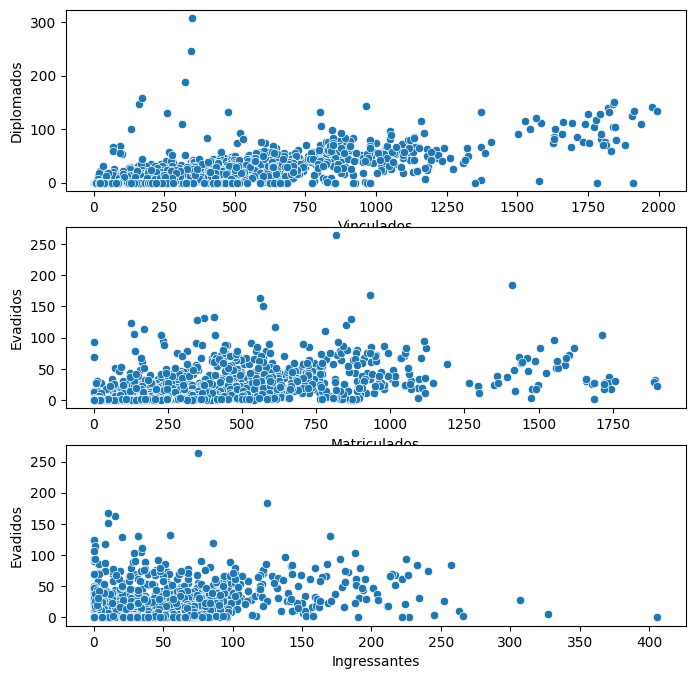

In [10]:
scatters(df_num)

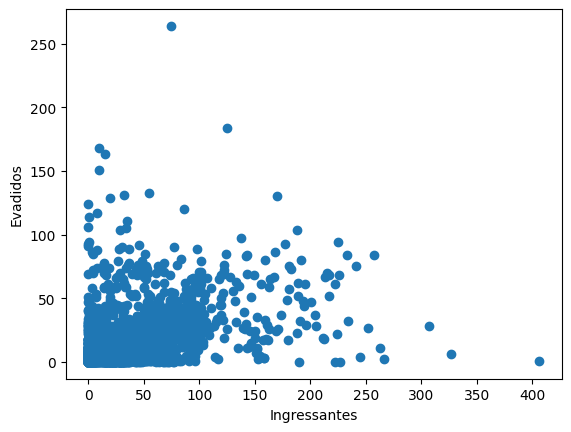

In [11]:
# Gráfico de dispersão
plt.scatter(df['Ingressantes'], df['Evadidos'])
plt.xlabel("Ingressantes")
plt.ylabel("Evadidos")
plt.show()

In [5]:
dens_por_ano = df[["Ano","Ingressantes","Evadidos"]].groupby("Ano").sum()

Correlação entre Ingressantes e Evadidos: 0.29845143963535503


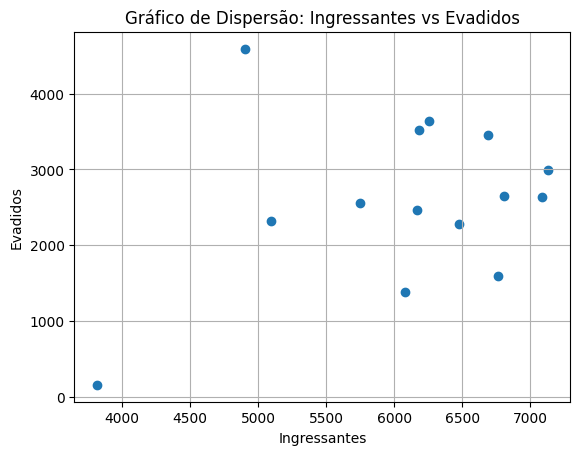

In [6]:
# Calcular a correlação entre as colunas 'Ingressantes' e 'Evadidos'
correlacao = dens_por_ano['Ingressantes'].corr(dens_por_ano['Evadidos'])

print("Correlação entre Ingressantes e Evadidos:", correlacao)

# Extrair as colunas de interesse para o gráfico de dispersão
x = dens_por_ano['Ingressantes']
y = dens_por_ano['Evadidos']

# Plotar o gráfico de dispersão
plt.scatter(x, y)
plt.xlabel('Ingressantes')
plt.ylabel('Evadidos')
plt.title('Gráfico de Dispersão: Ingressantes vs Evadidos')
plt.grid(True)
plt.show()

In [7]:
display(dens_por_ano)

,Ingressantes,Evadidos
Ano,,
2010,5093,2312
2011,5748,2552
2012,6163,2468
2013,6476,2272
2014,7085,2638
2015,6809,2646
2016,6690,3450
2017,6255,3640
2018,7128,2991


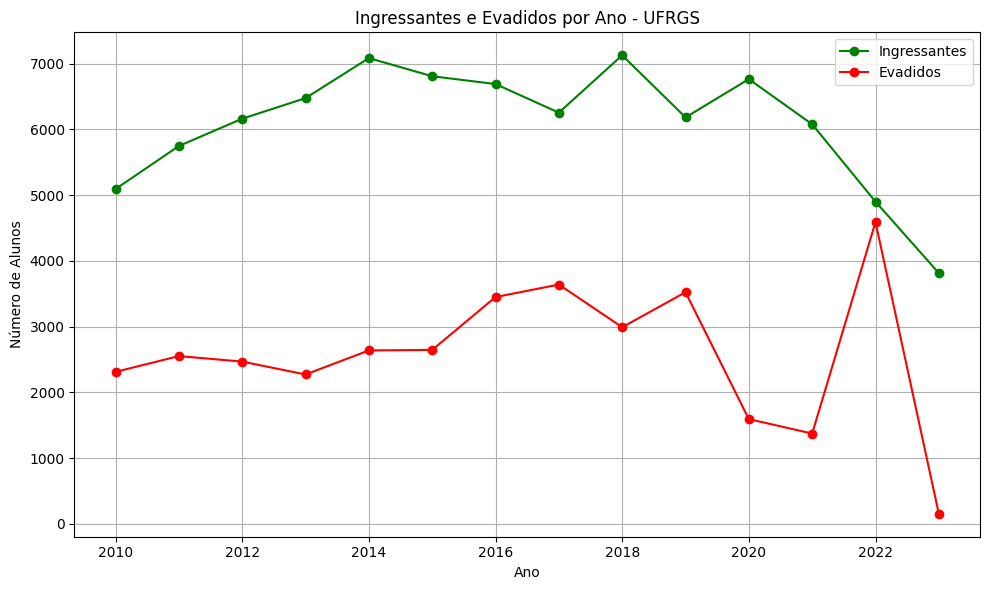

In [8]:
# Plotar os dados
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura
plt.plot(dens_por_ano.index, dens_por_ano["Ingressantes"], label='Ingressantes',color='green', marker='o')  # Plotar ingressantes
plt.plot(dens_por_ano.index, dens_por_ano["Evadidos"], label='Evadidos',color='red', marker='o')  # Plotar evadidos

# Adicionar rótulos aos eixos
plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Ingressantes e Evadidos por Ano - UFRGS')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()  # Ajustar o layout para evitar que as legendas se sobreponham
plt.show()

Dados brutos

In [12]:
display(df)

,CodCurso,NomeCurso,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
0,298,ADMINISTRAÇÃO,2010,1,1501,1349,169,91,24
1,583,ADMINISTRAÇÃO - EAD,2010,1,351,345,1,0,6
2,299,AGRONOMIA,2010,1,494,448,50,31,19
3,300,ARQUITETURA E URBANISMO,2010,1,625,578,53,41,12
4,301,ARQUIVOLOGIA,2010,1,157,134,30,4,6
...,...,...,...,...,...,...,...,...,...
2129,1490,RELAÇÕES PÚBLICAS,2023,1,281,248,26,0,1
2130,806,SAÚDE COLETIVA,2023,1,231,158,31,0,2
2131,907,SERVIÇO SOCIAL,2023,1,207,180,48,0,1
2132,302,TEATRO,2023,1,242,205,39,0,1


Densidade por curso e evasão por curso

In [14]:
dens_por_curso = df[["NomeCurso","Ingressantes"]].groupby("NomeCurso").sum()

In [15]:
display(dens_por_curso)

,Ingressantes
NomeCurso,
ADMINISTRAÇÃO,4283
ADMINISTRAÇÃO - EAD,1
ADMINISTRAÇÃO PÚBLICA E SOCIAL,714
AGRONOMIA,1248
ARQUITETURA E URBANISMO,1479
...,...
SAÚDE COLETIVA,785
SERVIÇO SOCIAL,497
TEATRO,623


In [16]:
ing_por_ano = df[["Ano","Ingressantes"]].groupby("Ano").sum()

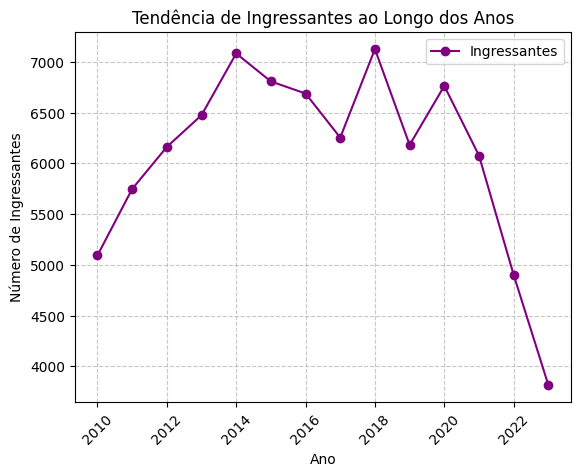

In [54]:
# Plotar o gráfico de linhas
dens_por_ano.plot(kind='line', marker='o', color='purple')
plt.title('Tendência de Ingressantes ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Ingressantes')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [18]:
ing_por_ano.sort_values(by="Ingressantes",ascending=False)

,Ingressantes
Ano,
2018,7128
2014,7085
2015,6809
2020,6765
2016,6690
2013,6476
2017,6255
2019,6183
2012,6163


Ordenando ingressantes em ordem descrescente

In [19]:
dens_por_curso.sort_values(by="Ingressantes",ascending=False)

,Ingressantes
NomeCurso,
CIÊNCIAS JURÍDICAS E SOCIAIS,4306
ADMINISTRAÇÃO,4283
LETRAS,3390
CIÊNCIAS SOCIAIS,2798
EDUCAÇÃO FÍSICA,2544
...,...
ADMINISTRAÇÃO - EAD,1
MÚSICA - ENSINO A DISTÂNCIA - EAD,0
ARTES VISUAIS - ENSINO A DISTÂNCIA - EAD,0


In [20]:
dens_por_curso.loc["CIÊNCIA DA COMPUTAÇÃO"]

Ingressantes    1693
Name: CIÊNCIA DA COMPUTAÇÃO, dtype: int64

Calculando agora os evadidos por curso

In [21]:
ev_curso = df[["NomeCurso","Evadidos"]].groupby("NomeCurso").sum()

In [52]:
display(ev_curso)

,Evadidos
NomeCurso,
ADMINISTRAÇÃO,1486
ADMINISTRAÇÃO - EAD,36
ADMINISTRAÇÃO PÚBLICA E SOCIAL,273
AGRONOMIA,439
ARQUITETURA E URBANISMO,394
...,...
SAÚDE COLETIVA,372
SERVIÇO SOCIAL,111
TEATRO,222


<class 'pandas.core.frame.DataFrame'>


In [23]:
ev_curso.sort_values(by="Evadidos",ascending=False)

,Evadidos
NomeCurso,
CIÊNCIAS SOCIAIS,1892
LETRAS,1750
MATEMÁTICA,1542
ADMINISTRAÇÃO,1486
FÍSICA,1485
...,...
CIÊNCIAS BIOLÓGICAS - BIOLOGIA MARINHA,5
DESENVOLVIMENTO REGIONAL - LITORAL NORTE,4
ENGENHARIA DE SERVIÇOS - LITORAL NORTE,1


In [24]:
ev_curso.loc["CIÊNCIA DA COMPUTAÇÃO"]

Evadidos    702
Name: CIÊNCIA DA COMPUTAÇÃO, dtype: int64

Ingressantes por ano, CIC e ECP

In [25]:
# Filtrar os dados para os cursos 'CIÊNCIA DA COMPUTAÇÃO' e 'ENGENHARIA DE COMPUTAÇÃO'
df_filtrado = df[df['NomeCurso'].isin(['CIÊNCIA DA COMPUTAÇÃO', 'ENGENHARIA DE COMPUTAÇÃO'])]

# Agrupar por ano e calcular a soma de evadidos por ano
ing_por_ano_f = df_filtrado.groupby('Ano')['Ingressantes'].sum()


# Transformar a série em um DataFrame
df_ingressantes = pd.DataFrame({'Ano': ing_por_ano_f.index, 'Ingressantes': ing_por_ano_f.values})

ing_por_ano_f = df_ingressantes
# Exibir o DataFrame resultante
print(ing_por_ano_f)


     Ano  Ingressantes
0   2010           168
1   2011           200
2   2012           180
3   2013           178
4   2014           227
5   2015           210
6   2016           230
7   2017           214
8   2018           162
9   2019           198
10  2020           233
11  2021           206
12  2022           191
13  2023           134


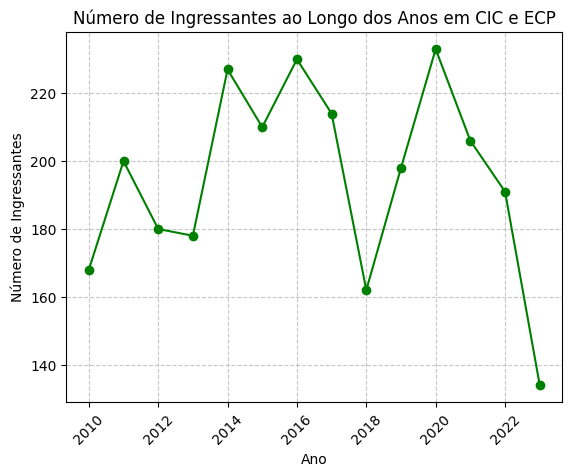

In [26]:
# Plotar o gráfico de linhas
dens_por_ano_f.plot(kind='line', marker='o', color='green')
plt.title('Número de Ingressantes ao Longo dos Anos em CIC e ECP')
plt.xlabel('Ano')
plt.ylabel('Número de Ingressantes')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Calculando agora os evadidos por ano, CIC e ECP

In [27]:
ev_por_ano = df[["Ano","Evadidos"]].groupby("Ano").sum()

In [28]:
# Filtrar os dados para os cursos 'CIÊNCIA DA COMPUTAÇÃO' e 'ENGENHARIA DE COMPUTAÇÃO'
df_filtrado = df[df['NomeCurso'].isin(['CIÊNCIA DA COMPUTAÇÃO', 'ENGENHARIA DE COMPUTAÇÃO'])]

# Agrupar por ano e calcular a soma de evadidos por ano
ev_por_ano_f = df_filtrado.groupby('Ano')['Evadidos'].sum()

# Exibir o resultado
print(ev_por_ano_f)

Ano
2010     75
2011     75
2012     77
2013     64
2014     70
2015     62
2016    139
2017    107
2018     87
2019    118
2020     52
2021     38
2022    153
2023      4
Name: Evadidos, dtype: int64


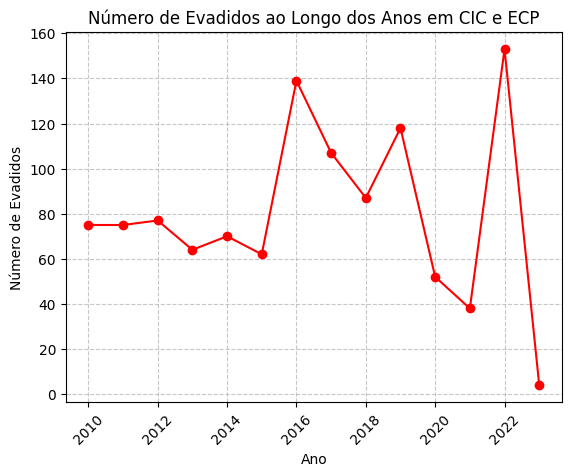

In [29]:
# Plotar o gráfico de linhas
ev_por_ano_f.plot(kind='line', marker='o', color='red')
plt.title('Número de Evadidos ao Longo dos Anos em CIC e ECP')
plt.xlabel('Ano')
plt.ylabel('Número de Evadidos')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [30]:
print(type(dens_por_ano_f))

<class 'pandas.core.series.Series'>


Agora, apresentando ingressantes e evadidos por ano em CIC e ECP no mesmo gráfico

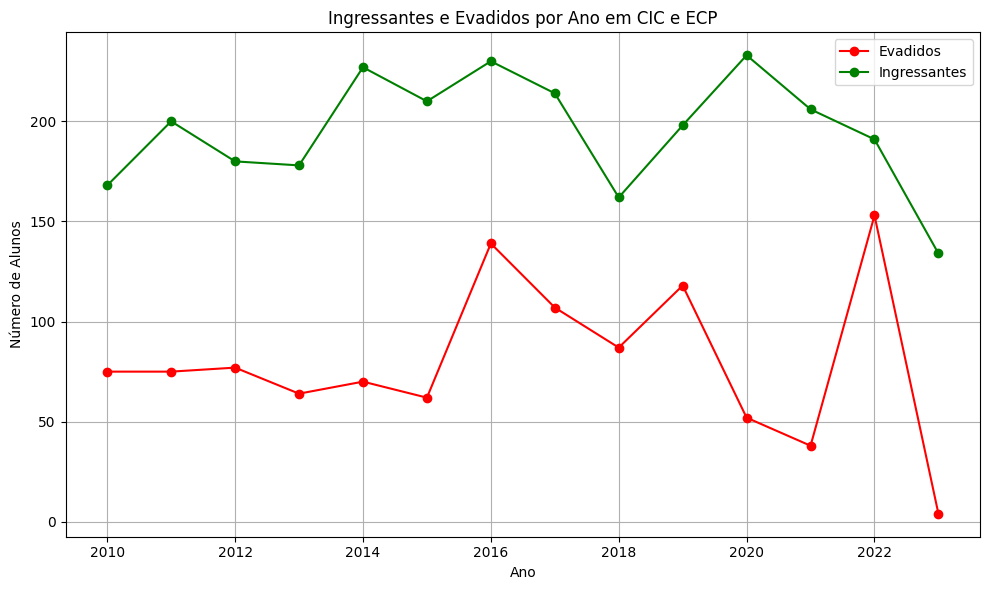

In [31]:
# Suponha que você tenha os objetos ev_por_ano_f e dens_por_ano_f

# Plotar os dados
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura

# Plotar o número de evadidos por ano
plt.plot(ev_por_ano_f.index, ev_por_ano_f.values, label='Evadidos', color='red', marker='o')

# Plotar o número de ingressantes por ano
plt.plot(dens_por_ano_f.index, dens_por_ano_f.values, label='Ingressantes', color='green', marker='o')

# Adicionar rótulos aos eixos
plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Ingressantes e Evadidos por Ano em CIC e ECP')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()  # Ajustar o layout para evitar que as legendas se sobreponham
plt.show()


Calculando evadidos por ano

In [32]:
display(ev_por_ano)

,Ano,Evadidos
0,2010,75
1,2011,75
2,2012,77
3,2013,64
4,2014,70
5,2015,62
6,2016,139
7,2017,107
8,2018,87
9,2019,118


In [33]:
ev_por_ano.sort_values(by="Evadidos",ascending=False)

,Evadidos
Ano,
2022,4591
2017,3640
2019,3523
2016,3450
2018,2991
2015,2646
2014,2638
2011,2552
2012,2468


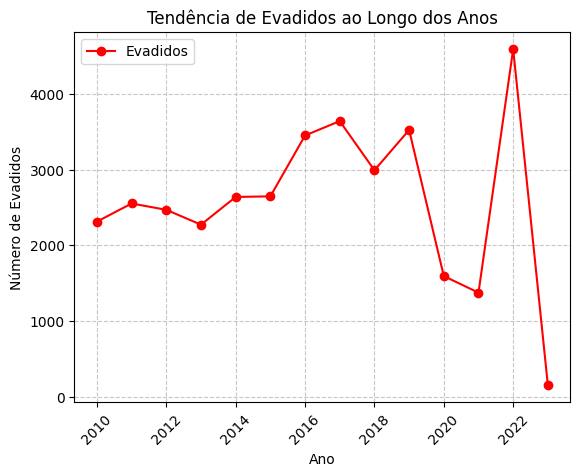

<class 'pandas.core.frame.DataFrame'>


In [34]:
display(ev_por_ano_f)
# Plotar o gráfico de linhas
ev_por_ano_f.plot(x='Ano', y='Evadidos', kind='line', marker='o', color='red')
plt.title('Tendência de Evadidos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Evadidos')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(type(ev_por_ano_f))

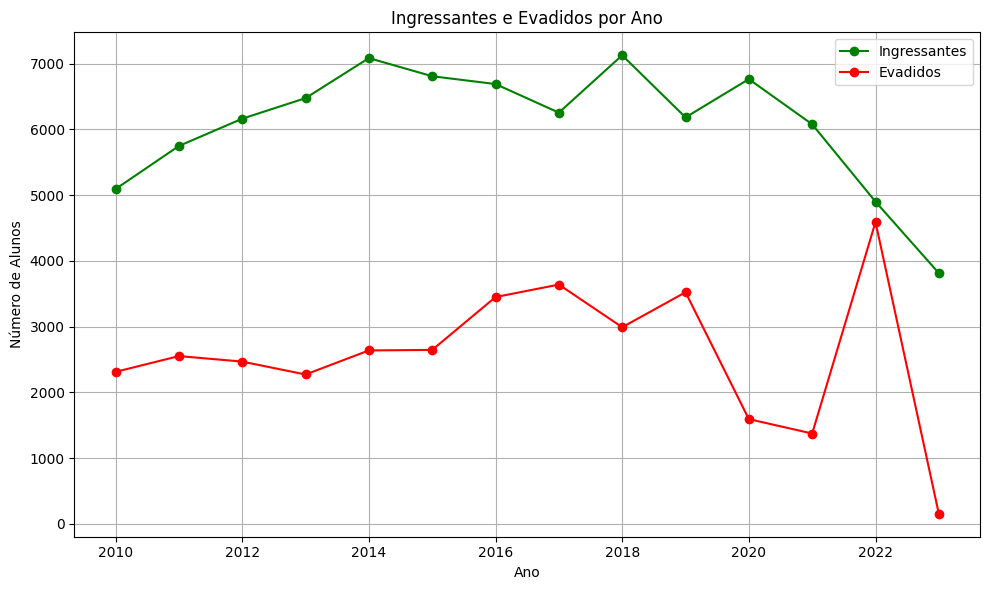

In [35]:
import matplotlib.pyplot as plt

# Suponha que você já tenha os DataFrames dens_por_ano e ev_por_ano

# Extrair os dados para plotagem
anos_densidade = ing_por_ano_f['Ano'] # Anos para o DataFrame dens_por_ano
ingressantes = ing_por_ano_f['Ingressantes']  # Dados de ingressantes
anos_evadidos = ev_por_ano_f['Ano']  # Anos para o DataFrame ev_por_ano
evadidos = ev_por_ano_f['Evadidos']  # Dados de evadidos

# Plotar os dados
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura
plt.plot(anos_densidade, ingressantes, label='Ingressantes',color='green', marker='o')  # Plotar ingressantes
plt.plot(anos_evadidos, evadidos, label='Evadidos',color='red', marker='o')  # Plotar evadidos

# Adicionar rótulos aos eixos
plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Ingressantes e Evadidos por Ano - CIC e ECP')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()  # Ajustar o layout para evitar que as legendas se sobreponham
plt.show()

In [36]:
df_completo = pd.merge(ing_por_ano_f, ev_por_ano_f, on='Ano')

# Exibir o DataFrame resultante
print(df_completo)
print(type(df_completo))

     Ano  Ingressantes  Evadidos
0   2010           168        75
1   2011           200        75
2   2012           180        77
3   2013           178        64
4   2014           227        70
5   2015           210        62
6   2016           230       139
7   2017           214       107
8   2018           162        87
9   2019           198       118
10  2020           233        52
11  2021           206        38
12  2022           191       153
13  2023           134         4
<class 'pandas.core.frame.DataFrame'>


In [37]:
print("Nomes das colunas:")
print(dens_por_ano.columns)

Nomes das colunas:
Index(['Ingressantes'], dtype='object')


In [38]:
print("Nomes das colunas:")
print(ev_por_ano.columns)


Nomes das colunas:
Index(['Evadidos'], dtype='object')


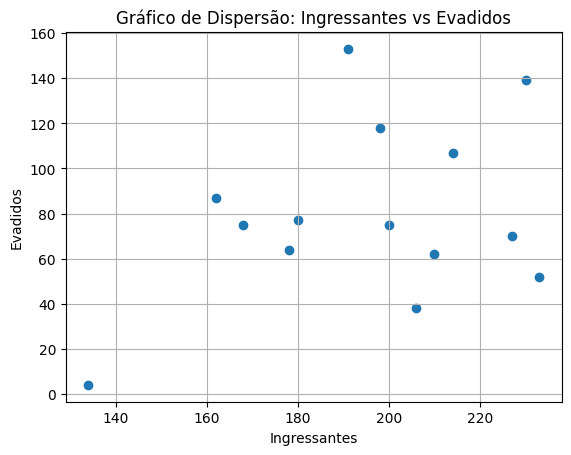

In [39]:
dens_por_ano.describe()

In [40]:
ev_por_ano.describe()

,Evadidos
count,14.000000
mean,2585.928571
std,1091.539806
min,153.000000
25%,2282.000000
50%,2595.000000
75%,3335.250000
max,4591.000000


In [41]:
dens_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 2010 to 2023
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Ingressantes  14 non-null     int64
dtypes: int64(1)
memory usage: 224.0 bytes


In [44]:
print(dens_por_ano)

      Ingressantes
Ano               
2010          5093
2011          5748
2012          6163
2013          6476
2014          7085
2015          6809
2016          6690
2017          6255
2018          7128
2019          6183
2020          6765
2021          6078
2022          4901
2023          3814


In [49]:
df_num.head()

,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
0,2010,1,1501,1349,169,91,24
1,2010,1,351,345,1,0,6
2,2010,1,494,448,50,31,19
3,2010,1,625,578,53,41,12
4,2010,1,157,134,30,4,6


Análise das distribuições dos dados numéricos

Matriz de correlação e mapa de calor de dens por ano e evadidos por ano

In [45]:
dip_curso = df[["NomeCurso","Diplomados"]].groupby("NomeCurso").sum()

In [46]:
display(dip_curso)

,Diplomados
NomeCurso,
ADMINISTRAÇÃO,2342
ADMINISTRAÇÃO - EAD,315
ADMINISTRAÇÃO PÚBLICA E SOCIAL,41
AGRONOMIA,763
ARQUITETURA E URBANISMO,978
...,...
SAÚDE COLETIVA,236
SERVIÇO SOCIAL,179
TEATRO,308


In [47]:
dip_curso.sort_values(by="Diplomados",ascending=False)

,Diplomados
NomeCurso,
CIÊNCIAS JURÍDICAS E SOCIAIS,2434
ADMINISTRAÇÃO,2342
MEDICINA,1789
EDUCAÇÃO FÍSICA,1641
LETRAS,1435
...,...
DESENVOLVIMENTO REGIONAL - LITORAL NORTE,1
BIBLIOTECONOMIA - ENSINO A DISTÂNCIA - EAD,0
CIÊNCIAS BIOLÓGICAS - BIOLOGIA MARINHA,0


In [48]:
dip_curso.loc["CIÊNCIA DA COMPUTAÇÃO"]

Diplomados    746
Name: CIÊNCIA DA COMPUTAÇÃO, dtype: int64